## Importação e preparação dos dados

Importe o dataset de pacientes diabéticos da biblioteca Scikit (load_diabetes) e separe os dados entre atributos (X) e saídas (y).

In [1]:
import sklearn.datasets as dt
x_diabetes, y_diabetes = dt.load_diabetes(return_X_y=True)

Mostre os formatos da variável de atributos e da variável de saídas.

In [2]:
type(x_diabetes)
#print(x_diabetes.shape)
#print(x_diabetes)

numpy.ndarray

In [3]:
type(y_diabetes)

numpy.ndarray

## Redução de Dimensionalidade

Importe e aplique as funções de redução de dimensionalidade (PCA, FastICA, Isomap e TSNE) para reduzir a dimensionalidade a apenas uma feature.

In [4]:
#print(x_diabetes)
#print(x_diabetes.shape)

from sklearn.decomposition import PCA
x_diabetes_pca = PCA(n_components=1).fit_transform(x_diabetes)
#print(x_diabetes_pca)

from sklearn.decomposition import FastICA
x_diabetes_FastICA = FastICA(n_components=1).fit_transform(x_diabetes)
#print(x_diabetes_FastICA)

from sklearn.manifold import Isomap
x_diabetes_Isomap = Isomap(n_components=1).fit_transform(x_diabetes)
#print(x_diabetes_Isomap)

from sklearn.manifold import TSNE
x_diabetes_TSNE = TSNE(n_components=1).fit_transform(x_diabetes)
#print(x_diabetes_TSNE)

Mostre o formato da nova variável de atributos após a redução de dimensionalidade para cada algoritmo.

In [5]:
x_diabetes_pca.shape

(442, 1)

In [6]:
x_diabetes_FastICA.shape

(442, 1)

In [7]:
x_diabetes_Isomap.shape

(442, 1)

In [8]:
x_diabetes_TSNE.shape

(442, 1)

### Caso mais simples

Faça a separação dos dados para treinamento e teste. Reserve 20% dos dados para teste.

In [9]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_diabetes_pca, y_diabetes, test_size=0.2)

Importe o regressor linear e utilize-o para gerar um modelo, então faça uma regressão com os dados de teste.

In [10]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)

#print(y_pred)
#print(y_diabetes)

Importe as funções de erro quadrático médio (MSE) e o coeficiente de determinação (R²), então imprima o MSE e o R².

In [11]:
from sklearn.metrics import mean_squared_error
print("MSE:", mean_squared_error(y_test, y_pred))
from sklearn.metrics import r2_score
print("R2 score:", r2_score(y_test, y_pred))

MSE: 4472.683273580081
R2 score: 0.16666221608203102


Então exiba o gráfico de dispersão dos dados de teste e a curva de regressão gerada.

In [12]:
import matplotlib.pyplot as plt
x = x_test
y = y_test
plt.scatter(x, y)
plt.plot(x, y_pred, color='red')
plt.title('Grafo de dispersão dos dados de teste')
plt.xlabel('Data')
plt.ylabel('Target')
plt.show()

<Figure size 640x480 with 1 Axes>

### Comparando Métodos de Redução de Dimensionalidade

Agora, a fim de comparar com outras técnicas, crie um método iterativo que realize as etapas de separação dos dados entre treinamento e teste, gere um modelo de regressão linear, faça a predição com base nos dados de testes e calcule o erro quadrático médio e o coeficiente de determinação para cada iteração. Então, calcule os valores mínimo, médio, máximo e desvio padrão para cada uma dessas duas métricas. Por fim, plote os histogramas (com 100 bins) das duas métricas. Use 10000 (dez mil) iterações.

#### PCA

In [13]:
import numpy as np
lista_MSE_PCA = []
lista_R2_PCA = []

for i in range (10000):
    x_train, x_test, y_train, y_test = train_test_split(x_diabetes_pca, y_diabetes, test_size=0.2)
    lr = LinearRegression()
    lr.fit(x_train, y_train)
    y_pred = lr.predict(x_test)
    lista_MSE_PCA.append(mean_squared_error(y_test, y_pred))
    lista_R2_PCA.append(r2_score(y_test, y_pred))

Métricas do PCA

MSE mínimo:  2464.209455838326
MSE médio:  4122.024913459833
MSE máximo:  6075.25248047288
MSE desvio padrão:  474.5486250504977


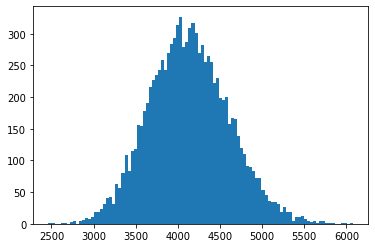

In [14]:
print("Métricas do PCA\n")
print("MSE mínimo: ", np.amin(lista_MSE_PCA))
print("MSE médio: ", np.median(lista_MSE_PCA))
print("MSE máximo: ", np.amax(lista_MSE_PCA))
print("MSE desvio padrão: ", np.std(lista_MSE_PCA))
plt.hist(lista_MSE_PCA, bins=100);

Métricas do PCA

R2 mínimo:  -0.046062473057445485
R2 médio:  0.3003391657151797
R2 máximo:  0.5102007695467465
R2 desvio padrão:  0.07127507764964794


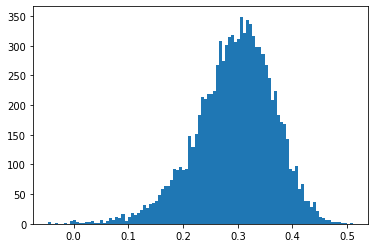

In [15]:
print("Métricas do PCA\n")
print("R2 mínimo: ", np.amin(lista_R2_PCA))
print("R2 médio: ", np.median(lista_R2_PCA))
print("R2 máximo: ", np.amax(lista_R2_PCA))
print("R2 desvio padrão: ", np.std(lista_R2_PCA))
plt.hist(lista_R2_PCA, bins=100);

#### ICA

In [16]:
lista_MSE_FastICA = []
lista_R2_FastICA = []

for i in range (10000):
    x_train, x_test, y_train, y_test = train_test_split(x_diabetes_FastICA, y_diabetes, test_size=0.2)
    lr = LinearRegression()
    lr.fit(x_train, y_train)
    y_pred = lr.predict(x_test)
    lista_MSE_FastICA.append(mean_squared_error(y_test, y_pred))
    lista_R2_FastICA.append(r2_score(y_test, y_pred))
    
print("Métricas do FastICA\n")

print("MSE mínimo: ", np.amin(lista_MSE_FastICA))
print("MSE médio: ", np.median(lista_MSE_FastICA))
print("MSE máximo: ", np.amax(lista_MSE_FastICA))
print("MSE desvio padrão: ", np.std(lista_MSE_FastICA))

print("R2 mínimo: ", np.amin(lista_R2_FastICA))
print("R2 médio: ", np.median(lista_R2_FastICA))
print("R2 máximo: ", np.amax(lista_R2_FastICA))
print("R2 desvio padrão: ", np.std(lista_R2_FastICA))

Métricas do FastICA

MSE mínimo:  2547.484659375016
MSE médio:  4127.845427434215
MSE máximo:  6133.708713152909
MSE desvio padrão:  471.5397616726118
R2 mínimo:  -0.06529718554856734
R2 médio:  0.29895733901930477
R2 máximo:  0.5265598082474945
R2 desvio padrão:  0.07211706266704855


#### Isomap

In [17]:
lista_MSE_Isomap = []
lista_R2_Isomap = []

for i in range (10000):
    x_train, x_test, y_train, y_test = train_test_split(x_diabetes_Isomap, y_diabetes, test_size=0.2)
    lr = LinearRegression()
    lr.fit(x_train, y_train)
    y_pred = lr.predict(x_test)
    lista_MSE_Isomap.append(mean_squared_error(y_test, y_pred))
    lista_R2_Isomap.append(r2_score(y_test, y_pred))
    
print("Métricas do Isomap\n")

print("MSE mínimo: ", np.amin(lista_MSE_Isomap))
print("MSE médio: ", np.median(lista_MSE_Isomap))
print("MSE máximo: ", np.amax(lista_MSE_Isomap))
print("MSE desvio padrão: ", np.std(lista_MSE_Isomap))

print("R2 mínimo: ", np.amin(lista_R2_Isomap))
print("R2 médio: ", np.median(lista_R2_Isomap))
print("R2 máximo: ", np.amax(lista_R2_Isomap))
print("R2 desvio padrão: ", np.std(lista_R2_Isomap))

Métricas do Isomap

MSE mínimo:  3587.6898269167064
MSE médio:  5602.260313156004
MSE máximo:  7917.348135946886
MSE desvio padrão:  584.2487926097067
R2 mínimo:  -0.2715244190778041
R2 médio:  0.04724685345934915
R2 máximo:  0.17710625349795428
R2 desvio padrão:  0.048025537784112636


#### TSNE

In [18]:
lista_MSE_TSNE = []
lista_R2_TSNE = []

for i in range (10000):
    x_train, x_test, y_train, y_test = train_test_split(x_diabetes_TSNE, y_diabetes, test_size=0.2)
    lr = LinearRegression()
    lr.fit(x_train, y_train)
    y_pred = lr.predict(x_test)
    lista_MSE_TSNE.append(mean_squared_error(y_test, y_pred))
    lista_R2_TSNE.append(r2_score(y_test, y_pred))
    
print("Métricas do TSNE\n")

print("MSE mínimo: ", np.amin(lista_MSE_TSNE))
print("MSE médio: ", np.median(lista_MSE_TSNE))
print("MSE máximo: ", np.amax(lista_MSE_TSNE))
print("MSE desvio padrão: ", np.std(lista_MSE_TSNE))

print("R2 mínimo: ", np.amin(lista_R2_TSNE))
print("R2 médio: ", np.median(lista_R2_TSNE))
print("R2 máximo: ", np.amax(lista_R2_TSNE))
print("R2 desvio padrão: ", np.std(lista_R2_TSNE))

Métricas do TSNE

MSE mínimo:  3383.4648506548183
MSE médio:  5108.388955800296
MSE máximo:  7351.484495978578
MSE desvio padrão:  552.2841943100683
R2 mínimo:  -0.23781202087756803
R2 médio:  0.13001029137043402
R2 máximo:  0.32834807088470197
R2 desvio padrão:  0.06380175563446384


### Comparando modelos de Regressão

Exiba o gráfico de dispersão dos dados de teste e a curva de regressão gerada em cada caso.

#### Least Squares

MSE: 6987.637993826352
R2_score: -0.0506112732386077


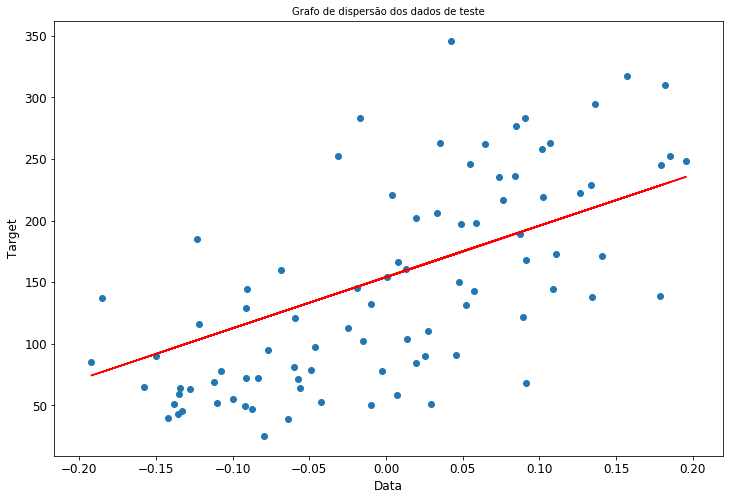

In [19]:
params = {'figure.figsize': [12, 8], 
          'axes.labelsize': 12,
          'axes.titlesize':10, 
          'font.size': 6,
          'legend.fontsize': 12, 
          'xtick.labelsize': 12, 
          'ytick.labelsize': 12
         }

plt.rcParams.update(params)

x_train, x_test, y_train, y_test = train_test_split(x_diabetes_pca, y_diabetes, test_size=0.2)
lr = LinearRegression()
lr.fit(x_train, y_train)
y_pred_lr = lr.predict(x_test)

print("MSE:",mean_squared_error(y_test, y_pred))
print("R2_score:",r2_score(y_test, y_pred))

x = x_test
y = y_test
plt.scatter(x, y)
plt.plot(x, y_pred_lr, color='red')
plt.title('Grafo de dispersão dos dados de teste')
plt.xlabel('Data')
plt.ylabel('Target')
plt.show()

#### Ridge

MSE: 6987.637993826352
R2_score: -0.0506112732386077


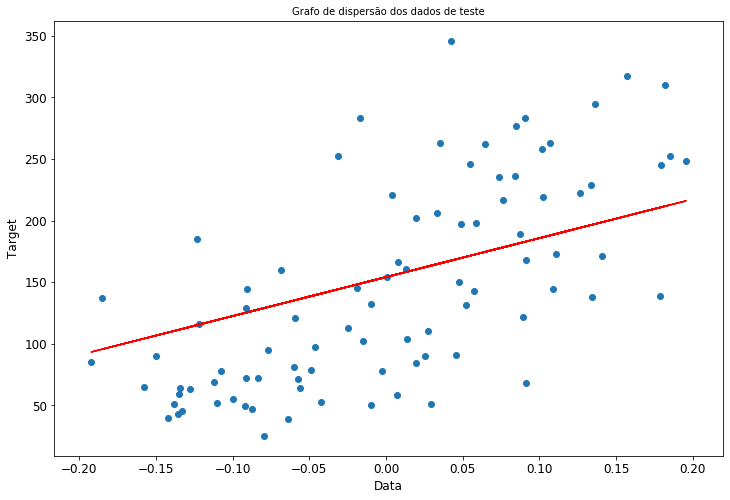

In [20]:
from sklearn.linear_model import Ridge
rid = Ridge(alpha=1.0)
rid.fit(x_train, y_train)
y_pred_rid = rid.predict(x_test)

print("MSE:",mean_squared_error(y_test, y_pred))
print("R2_score:",r2_score(y_test, y_pred))

x = x_test
y = y_test
plt.scatter(x, y)
plt.plot(x, y_pred_rid, color='red')
plt.title('Grafo de dispersão dos dados de teste')
plt.xlabel('Data')
plt.ylabel('Target')
plt.show()

#### Lasso

MSE: 6987.637993826352
R2_score: -0.0506112732386077


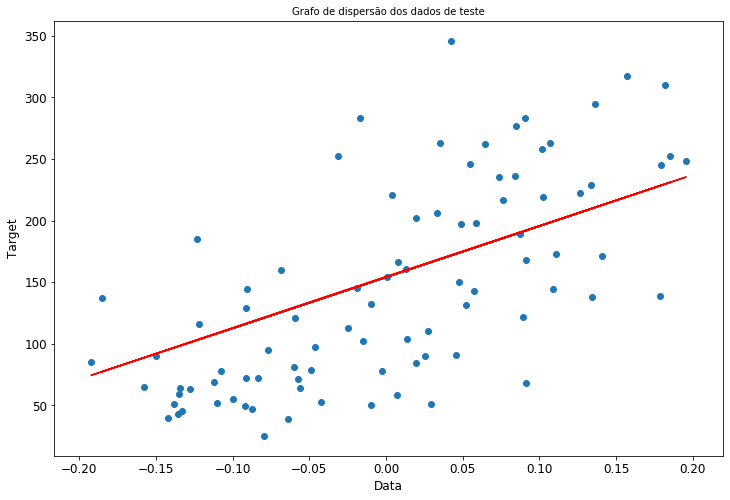

In [21]:
from sklearn import linear_model
lss = linear_model.Lasso(alpha=0.01)
lss.fit(x_train, y_train)
y_pred_lss = lss.predict(x_test)

print("MSE:",mean_squared_error(y_test, y_pred))
print("R2_score:",r2_score(y_test, y_pred))

x = x_test
y = y_test
plt.scatter(x, y)
plt.plot(x, y_pred_lss, color='red')
plt.title('Grafo de dispersão dos dados de teste')
plt.xlabel('Data')
plt.ylabel('Target')
plt.show()

#### Lasso LARS

MSE: 6987.637993826352
R2_score: -0.0506112732386077


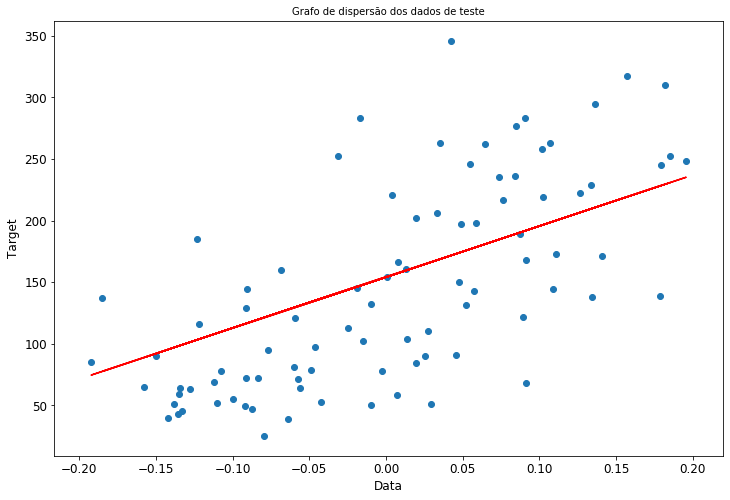

In [22]:
ll = linear_model.LassoLars(alpha=0.01)
ll.fit(x_train, y_train)
y_pred_ll = ll.predict(x_test)

print("MSE:",mean_squared_error(y_test, y_pred))
print("R2_score:",r2_score(y_test, y_pred))

x = x_test
y = y_test
plt.scatter(x, y)
plt.plot(x, y_pred_ll, color='red')
plt.title('Grafo de dispersão dos dados de teste')
plt.xlabel('Data')
plt.ylabel('Target')
plt.show()

#### Bayesian Ridge

MSE: 6987.637993826352
R2_score: -0.0506112732386077


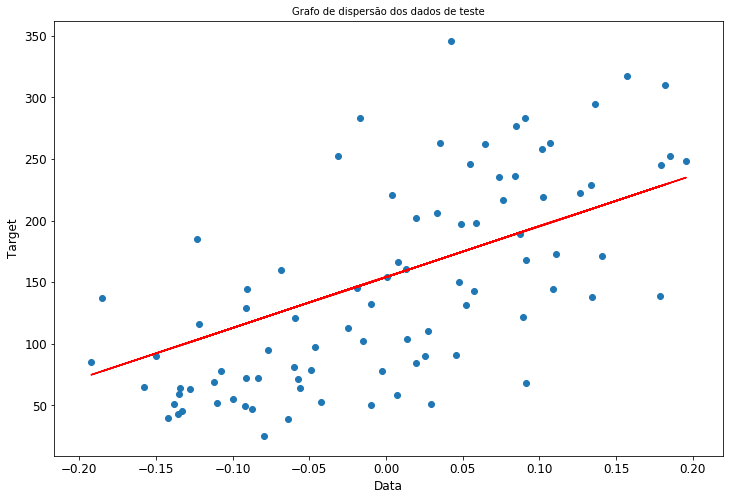

In [23]:
br = linear_model.BayesianRidge()
br.fit(x_train, y_train)
y_pred_br = br.predict(x_test)

print("MSE:",mean_squared_error(y_test, y_pred))
print("R2_score:",r2_score(y_test, y_pred))

x = x_test
y = y_test
plt.scatter(x, y)
plt.plot(x, y_pred_br, color='red')
plt.title('Grafo de dispersão dos dados de teste')
plt.xlabel('Data')
plt.ylabel('Target')
plt.show()

#### RANSAC

MSE: 6987.637993826352
R2_score: -0.0506112732386077


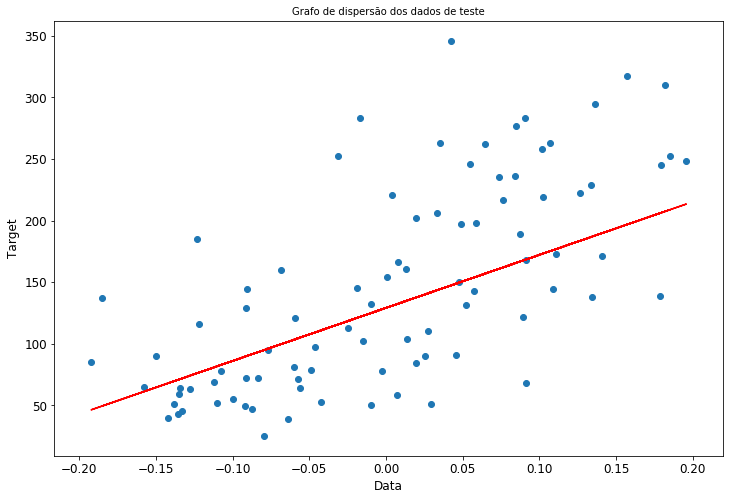

In [24]:
from sklearn.linear_model import RANSACRegressor
ran = RANSACRegressor(random_state=0)
ran.fit(x_train, y_train)
y_pred_ran = ran.predict(x_test)

print("MSE:",mean_squared_error(y_test, y_pred))
print("R2_score:",r2_score(y_test, y_pred))

x = x_test
y = y_test
plt.scatter(x, y)
plt.plot(x, y_pred_ran, color='red')
plt.title('Grafo de dispersão dos dados de teste')
plt.xlabel('Data')
plt.ylabel('Target')
plt.show()

#### Theil-Sen

MSE: 6987.637993826352
R2_score: -0.0506112732386077


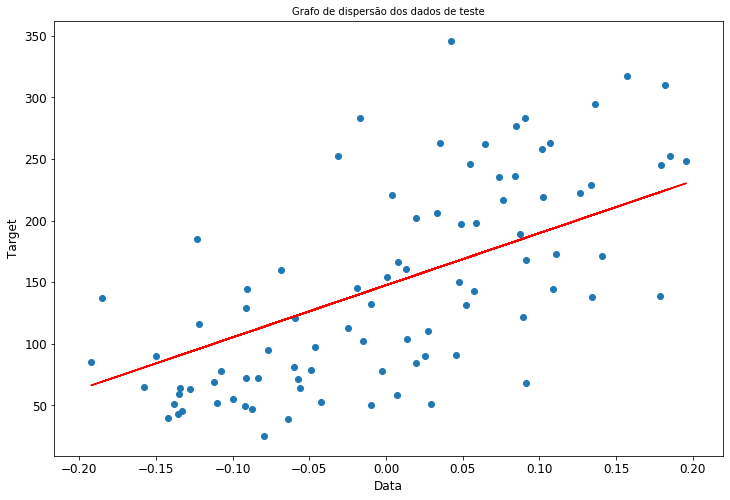

In [25]:
from sklearn.linear_model import TheilSenRegressor
th = TheilSenRegressor(random_state=0)
th.fit(x_train, y_train)
y_pred_th = th.predict(x_test)

print("MSE:",mean_squared_error(y_test, y_pred))
print("R2_score:",r2_score(y_test, y_pred))

x = x_test
y = y_test
plt.scatter(x, y)
plt.plot(x, y_pred_th, color='red')
plt.title('Grafo de dispersão dos dados de teste')
plt.xlabel('Data')
plt.ylabel('Target')
plt.show()

### Gráfico geral comparativo

Em uma mesma figura, mostre novamente o gráfico de dispersão dos dados e plote cada um dos modelos gerados utilizando cada técnica deste laboratório. Atente-se a fazer com que o gráfico seja suficientemente autoexplicativo, então utilize diferentes cores, insira uma legenda etc.

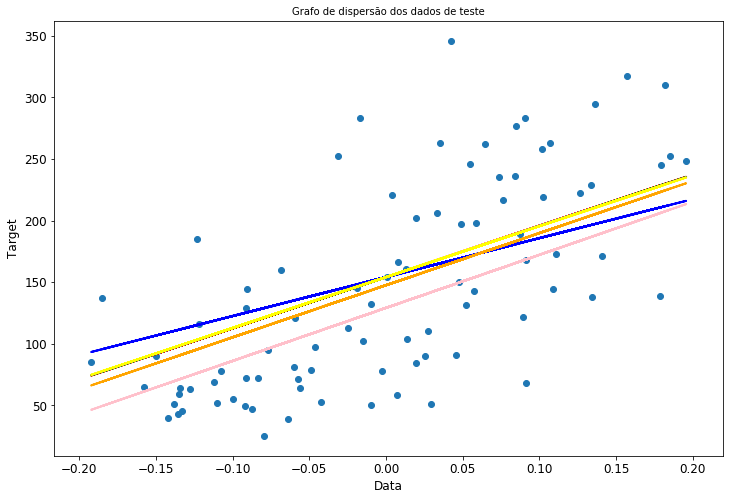

In [26]:
plt.scatter(x_test, y_test)
plt.plot(x_test, y_pred_lr, color='red', linewidth=2, label="LR")
plt.plot(x_test, y_pred_rid, color='blue', linewidth=2, label="Rid")
plt.plot(x, y_pred_lss, color='green', linewidth=2, label="Lasso")
plt.plot(x, y_pred_ll, color='gray', linewidth=2, label="LL")
plt.plot(x, y_pred_br, color='yellow', linewidth=2, label="BR")
plt.plot(x, y_pred_ran, color='pink', linewidth=2, label="Ransac")
plt.plot(x, y_pred_th, color='orange', linewidth=2, label="Theil-Sen")
plt.title('Grafo de dispersão dos dados de teste')
plt.xlabel('Data')
plt.ylabel('Target')
plt.show()